## DIMENSIONALITY REDUCTION

**1. What are the main motivations for reducing a dataset’s dimensionality? What are the main drawbacks?**

Las principales motivaciones son las siguientes: 
- Acelerar el entrenamiento: Al tener menos dimensiones (features), los algoritmos de aprendizaje requieren menos cálculos, lo que acelera el entrenamiento. 
- Visualización de datos: reducir las dimensiones a dos o a tres permite crear gráficos para detectar patrones visuales, que no serían visibles en espacion de altas dimensiones. 
- Combatir el esparcimiento de los datos: en espacios con muchas dimensiones, los datos suelen ser muy dispersos, lo que aumenta el riesgo de que el modelo se aprenda del ruido y sufra de sobreajuste. 
- Limpiar los datos: ayuda a eliminar ruido y detalles innecesarios, o a fusionar características que están muy correlacionadas, mejorando a veces el rendimiento del sistema. 

Sus principales desventajas son: 
- Pérdida de información: la reducción siempre conlleva una pérdida de calidad y detalla, lo que puede hacer que el sistema funcione ligeramente peor que con los datos originales. 
- Costo computacional: el proceso mismo de reducir las dimensiones puede ser pesado y consumir mucho tiempo de procesamiento. 
- Complejidad adicional: añade pasos adicionales a los pipelines, lo que hace que el sistema sea más difícil de mantener y depurar. 



**2. What is the curse of dimensionality?**

La "maldición" de la dimensionalidad hace referencia a que muchas cosas se comportan de forma distinta en espacios de altas dimensiones. Esto implica que hay un alto riesgo de que los datasets de altas dimensiones sean dispersos: muchas instancias de entrenamiento estan lejos de las otras. Esto también implica que una nueva instancia estará también lejos de cualquiera de ellas, lo que supone que hacer predicciones es mucho menos realista que en bajas dimensiones, puesto que estarán basadas en extropolaciones muchos más largas. En resumen, cuantás más dimensiones tenga un set de entrenamiento, mayor es el riesgo de caer en el sobreajuste. 

3. **Once a dataset’s dimensionality has been reduced, is it possible to reverse the
operation? If so, how? If not, why?**


Si, es posible revertir la operación. En el caso de PCA, se puede realizar una transformación inversa multiplicando los datos reducidos por la transpuesta de la matriz de componentes principales. Esta acción permitirá "descomponer" los datos para volver al número original de dimensiones. Sin embargo, estos no serán idénticos a los originales, ya que siempre existe una pérdida de información durante el proceso de reducción. 

4. **Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?**

Si, podemos utilizar PCA pero suele ser una opción subóptima para datos altamente no lineales puesto que es una técnica que intenta identificar el hiperplano más cercano a los datos. Si el conjunto de datos tiene una estructura curva o retorcida, una proyección de PCA simplemente "aplastará" las capas de los datos, mezclando información que debería estar separada. Para estos casos, es mejor utilizar el Kernel PCA o técnias de Manifold Learning como LLE. 

5. **Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained
variance ratio to 95%. How many dimensions will the resulting dataset have?**

El número de dimensiones finales no podemos determinarlo de antemano, ya que depende enteramente de la distribución de varianza dentro de los datos específicos. La cantidad de dimensiones resultantes será el número mínimo de componentes principales cuya suma de proporción de varianza explicada sea igual o mayor al 95%. Por ejemplo, si los datos están altamente correlacionados, podríamos reducir las 1.000 dimensiones a unas pocas decenas pero, si por el contrario, los datos son muy dispersos y no tienen una estructura clara, podríamos seguir necesitando casi las 1.000 dimensiones originales para alcanzar ese porcentaje. 


6. **In what cases would you use vanilla PCA, Incremental PCA, Randomized PCA,
or Kernel PCA?**

Cada variante de PCA la podemos usar para resolver problemas específicos: 
- Vanilla PCA (estándar): opción por defecto cuando el conjunto de datos cabe en la memoria RAM.
- Incremental PCA: para conjunto de datos gigantes que no caben en la memoria principal o para aplicaciones de aprendizaje en línea, donde los datos llegan en flujo constante. 
- Randomized PCA: ideal cuando necesitamos reducir drásticamente la dimensionalidad y el número de dimensiones deseadas (d) es mucho menor que el número de características originales. 
- Kernel PCA: cuando los datos tienen una estructura altamente no lineal. Es el que nos permite realizar proyecciones complejas y "desenrrollar" variedades retornidas. 

7. **How can you evaluate the performance of a dimensionality reduction algorithm
on your dataset?**

Existen dos formas principales de medir si la reducción de dimensiones fue exitosa: 
- Medición del error de reconstrucción: podemos medir la distancia cuadrática media entre los datos originales y los datos comprimidos y luego descomprimirlos. Si el error es bajo, se preservó la mayor parte de la información. 
- Rendimiento en la tarea posterior: si la reducción es un paso previo a un algoritmo de aprendizaje supervisado, la mejor forma de evaluarlo es medir el rendimiento final del sistema (preidción o error). Si reducir las dimensiones no afecta significativamente la precisión pero acelera mucho el entrenamiento, el algoritmo a funcionado bien. 

8. **Does it make any sense to chain two different dimensionality reduction algorithms?**

Sí, tiene sentido y es bastante común. Aquí presento algunos ejemplos: 
- PCA + Manifold Learning: Se puede usar PCA primero para eliminar el ruido y reducir rápidamente el número de dimensiones a un nivel manejable, y luego aplicar un algoritmo más complejo y costoso computacionalmente, como LLE, para capturar las relaciones no lineales.
- Reducción + Clasificación: Por ejemplo, el Análisis Discriminante Lineal (LDA) se puede usar para reducir dimensiones buscando los ejes que mejor separan las clases antes de alimentar esos datos a otro clasificador como un SVM.
- Aceleración de otros ensambles: Se puede usar una reducción inicial (como PCA) para que algoritmos sensibles a la dimensionalidad, como los Random Forests, entrenen mucho más rápido sin perder información crítica

In [15]:
import numpy as np
from sklearn.datasets import make_moons, fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.base import clone
from scipy.stats import mode
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import time

9. **Load the MNIST dataset (introduced in Chapter 3) and split it into a training set
and a test set (take the first 60,000 instances for training, and the remaining
10,000 for testing).**



In [3]:
#1. Cargar los datos
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

#2. Separación features
X, y = mnist["data"], mnist["target"]

#3. División de sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=60000, random_state=42)


- **Train a Random Forest classifier on the dataset and time how
long it takes, then evaluate the resulting model on the test set.**

In [4]:
#Instancia del modelo
rdf_classifier = RandomForestClassifier()

#Entrenar el modelo y calcular tiempo
start_time = time.time()
rdf_classifier.fit(X_train, y_train)
end_time = time.time()

#Evaluar rendimiento
test_score = rdf_classifier.score(X_test, y_test)
print(f"Tiempo total de entrenamiento: {end_time - start_time:.2f}s")
print(f"Accuracy del RF sin reducción de dimensionalidad: {test_score:.3f}")

Tiempo total de entrenamiento: 4.13s
Accuracy del RF sin reducción de dimensionalidad: 0.949


**Next, use PCA to
reduce the dataset’s dimensionality, with an explained variance ratio of 95%.**

In [5]:
#Aplicación de PCA a conjunto de entrenamiento y prueba
pca = PCA(n_components=0.95)
X_train_reducido = pca.fit_transform(X_train)
X_test_reducido = pca.transform(X_test)


print(f"Número de componentes tras PCA: {pca.n_components_}")


Número de componentes tras PCA: 151


**Train a new Random Forest classifier on the reduced dataset and see how long it
takes. Was training much faster? Next evaluate the classifier on the test set: how
does it compare to the previous classifier?**

In [6]:
#Entrenar un nuevo modelo en los datos reducitos
new_rdf_classifier = RandomForestClassifier()

#Evaluaciónd el tiempo
start_time = time.time()
new_rdf_classifier.fit(X_train_reducido, y_train)
end_time = time.time()

#Evaluar rendimiento
new_test_score = new_rdf_classifier.score(X_test_reducido, y_test)
print(f"Tiempo total de entrenamiento: {end_time - start_time:.2f}s")
print(f"Accuracy del RF sin reducción de dimensionalidad: {new_test_score:.3f}")

Tiempo total de entrenamiento: 8.81s
Accuracy del RF sin reducción de dimensionalidad: 0.919


#### 📉 Análisis de Rendimiento: ¿PCA siempre acelera el entrenamiento?

En este experimento, se comparó un **Random Forest Classifier** entrenado con el dataset original (784 dimensiones) frente a uno entrenado con dimensiones reducidas mediante **PCA** (manteniendo el 95% de la varianza, ~151 componentes).

##### 📊 Resultados Observados
| Métrica | Datos Originales | Datos con PCA |
| :--- | :--- | :--- |
| **Tiempo de Entrenamiento** | 4.13 segundos | 8.81 segundos (Más lento) |
| **Precisión (Accuracy)** | 94.9% | 91.9% (Ligera pérdida) |

##### 🧠 Conclusión Técnica
Contrario a la intuición inicial, la reducción de dimensionalidad **ralentizó** el proceso de entrenamiento en este caso particular. Esto se debe a la transformación de características:

1. **De Disperso a Denso:** Los datos originales de MNIST son altamente dispersos (muchos ceros), lo que permite a los árboles de decisión encontrar puntos de corte (*splits*) de forma muy eficiente.
2. **Complejidad del Split:** PCA genera componentes densos donde cada valor es una combinación compleja de los píxeles originales. Esto obliga al algoritmo a realizar una búsqueda mucho más exhaustiva para encontrar el umbral de división óptimo en cada nodo del árbol.

**Lección aprendida:** La reducción de dimensionalidad es vital para algoritmos sensibles a la distancia (como SVM o K-NN), pero para algoritmos basados en árboles de decisión, puede resultar contraproducente tanto en tiempo de ejecución como en precisión si la estructura de los datos originales ya es favorable para el particionamiento.

10. **Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the
result using Matplotlib. You can use a scatterplot using 10 different colors to rep‐
resent each image’s target class. Alternatively, you can write colored digits at the
location of each instance, or even plot scaled-down versions of the digit images
themselves (if you plot all digits, the visualization will be too cluttered, so you
should either draw a random sample or plot an instance only if no other instance
has already been plotted at a close distance). You should get a nice visualization
with well-separated clusters of digits. Try using other dimensionality reduction
algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.**

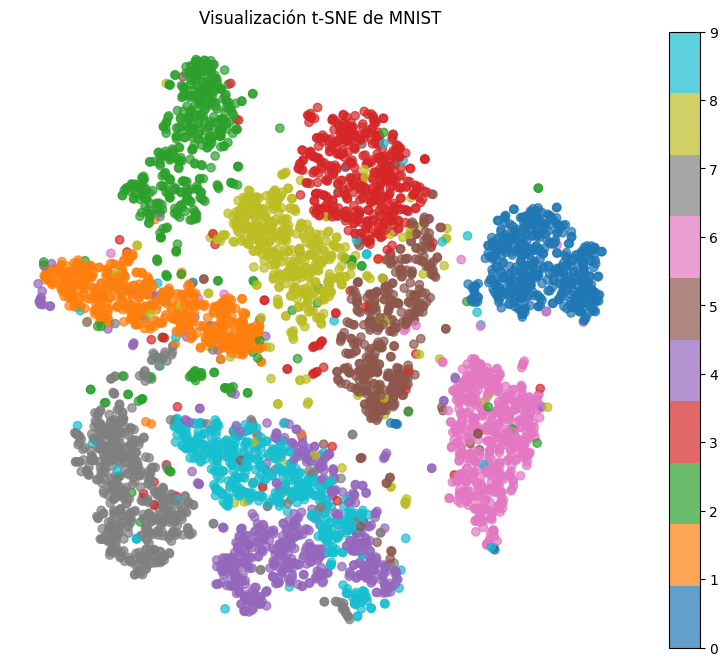

In [7]:
#Tomamos una muestra pequeña del dataset 
X_subset = X[:5000]
y_subset = y[:5000]

#Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(X_subset)

plt.figure(figsize=(10, 8))
# Usamos un mapa de colores 'tab10' que tiene 10 colores distintos
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset.astype(int), cmap="tab10", alpha=0.7)
plt.colorbar(scatter)
plt.title("Visualización t-SNE de MNIST")
plt.axis("off")
plt.show()

- **Análisis Técnico:** Esta visualización es la más efectiva para MNIST porque t-SNE es un algoritmo de Manifold Learning que prioriza la preservación de las distancias locales. Al mantener a los "vecinos cercanos" juntos, logra proyectar las 784 dimensiones en clusters circulares y densos muy bien definidos.

- **Observación de Datos:** Se identifican claramente grupos aislados (como el 0 en azul oscuro y el 1 en naranja), lo que indica una alta separabilidad. Las zonas de ligero solapamiento (como entre el 4, 7 y 9) revelan de forma natural la similitud morfológica de los trazos que a menudo confunden a los clasificadores.

#### PCA: Ejecución y visualización

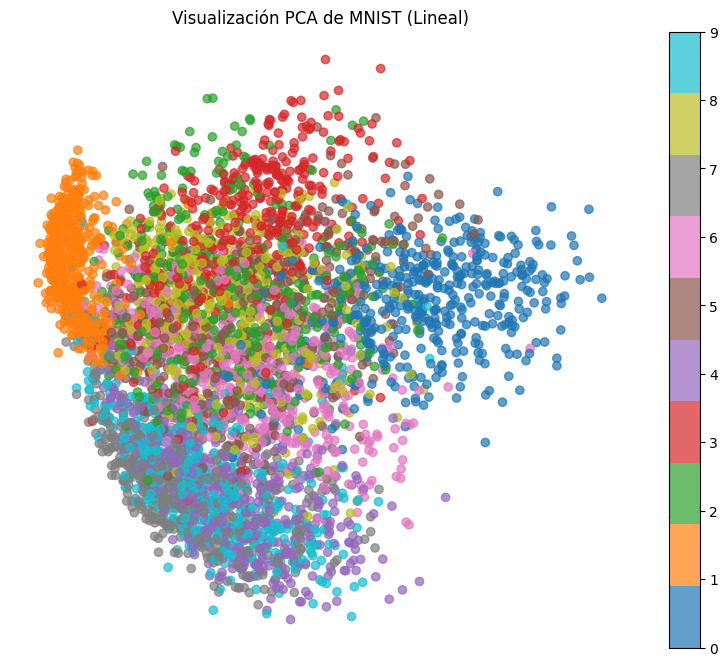

In [11]:
 # 1. Inicializar y ajustar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_subset)

# 2. Graficar
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_subset.astype(int), cmap="tab10", alpha=0.7)
plt.colorbar()
plt.title("Visualización PCA de MNIST (Lineal)")
plt.axis("off")
plt.show()

- **Análisis Técnico:** A diferencia de t-SNE, PCA es una técnica lineal que intenta maximizar la varianza global. Aquí observamos las limitaciones del álgebra lineal frente a datos de imagen complejos: los dígitos se solapan en una masa central porque las relaciones espaciales entre píxeles no son lineales.

- **Observación de Datos:** Aunque el dígito 1 (columna naranja a la izquierda) logra separarse ligeramente debido a su forma única, la mayoría de las clases convergen. Esto evidencia que el 95% de la varianza capturada globalmente no es suficiente para distinguir las fronteras de decisión de clases con rasgos sutiles.

#### LLE: Ejecución y visualización

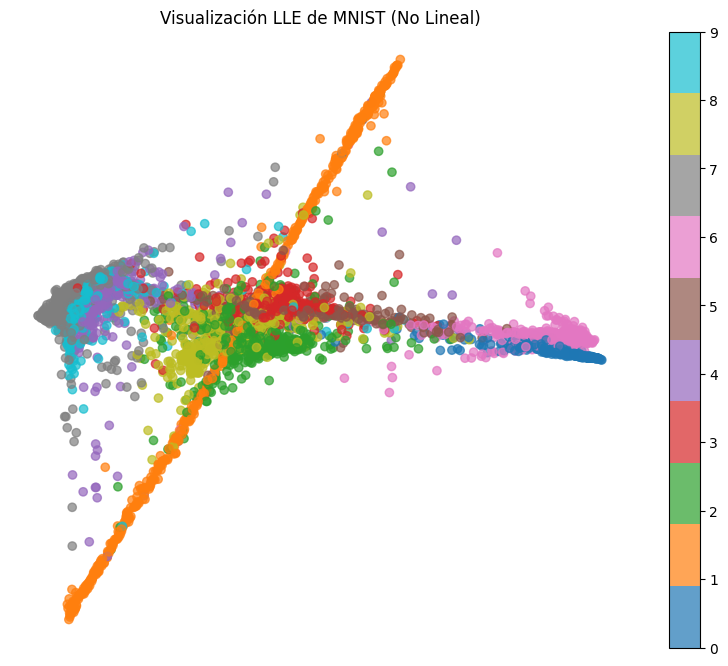

In [13]:
# 1. Inicializar y ajustar LLE
# n_neighbors define cuántos puntos cercanos se consideran para la linealidad local
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_lle = lle.fit_transform(X_subset)

# 2. Graficar
plt.figure(figsize=(10, 8))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y_subset.astype(int), cmap="tab10", alpha=0.7)
plt.colorbar()
plt.title("Visualización LLE de MNIST (No Lineal)")
plt.axis("off")
plt.show()

- **Análisis Técnico:** LLE busca preservar las relaciones lineales dentro de vecindarios locales, intentando "desenrollar" la estructura de los datos. El resultado muestra formas alargadas y ramificadas (tipo "tentáculos"), lo cual es característico de cómo el algoritmo intenta mapear el espacio de alta dimensión en una superficie continua.

- **Observación de Datos:** Se percibe una estructura más organizada que en PCA, pero menos segmentada que en t-SNE.

#### MDS: Ejecución y visualización

c:\Users\ronge\Desktop\PROGRAMACION\DATA SCIENCE\Teoría ML\.venv\Lib\site-packages\sklearn\manifold\_mds.py:744: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9. To suppress this warning, provide some value of `n_init`.
  warnings.warn(
c:\Users\ronge\Desktop\PROGRAMACION\DATA SCIENCE\Teoría ML\.venv\Lib\site-packages\sklearn\manifold\_mds.py:754: FutureWarning: The default value of `init` will change from 'random' to 'classical_mds' in 1.10. To suppress this warning, provide some value of `init`.
  warnings.warn(
c:\Users\ronge\Desktop\PROGRAMACION\DATA SCIENCE\Teoría ML\.venv\Lib\site-packages\sklearn\manifold\_mds.py:779: FutureWarning: Use metric_mds=True instead of metric=True. The support for metric={True/False} will be dropped in 1.10.
  warnings.warn(


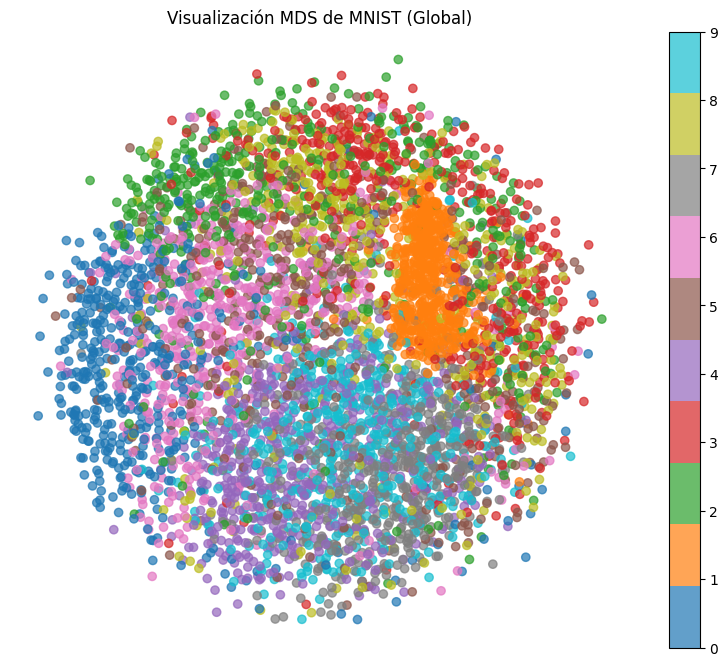

In [16]:
# 1. Inicializar y ajustar MDS
# Usamos metric=True (por defecto) para MDS métrico
mds = MDS(n_components=2, metric=True, random_state=42, normalized_stress='auto')
X_mds = mds.fit_transform(X_subset)

# 2. Graficar
plt.figure(figsize=(10, 8))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y_subset.astype(int), cmap="tab10", alpha=0.7)
plt.colorbar()
plt.title("Visualización MDS de MNIST (Global)")
plt.axis("off")
plt.show()

- **Análisis Técnico:** MDS es una técnica que intenta preservar las distancias globales por pares entre todas las instancias del dataset. A diferencia de t-SNE que se enfoca en vecinos cercanos, MDS trata de mantener la "geometría general" del espacio de 784 dimensiones al aplastarlo a 2D. La nube esférica resultante es indicativa del alto "estrés" o error que implica intentar satisfacer todas estas restricciones de distancia de largo alcance en un plano bidimensional.

- **Observación de Datos:** El resultado es visualmente muy similar al de PCA, mostrando una gran aglomeración central donde la mayoría de los dígitos se solapan significativamente. Al igual que en los métodos anteriores, los dígitos con trazos muy característicos como el 1 (cluster naranja arriba a la derecha) y parcialmente el 0 (azul a la izquierda) logran cierta separación periférica. Sin embargo, la mezcla masiva en el centro confirma que, a nivel de distancias euclidianas globales, muchos dígitos resultan indistinguibles en 2D.